##Imports

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

##Inspecting The Datasets

**make_moons:** 
- Generate 2d binary classification datasets
- It is useful for visualisation. It produces two interleaving half circles.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons

In [ ]:
X, y = make_moons(200, noise=.05)# noise => noise added to the data

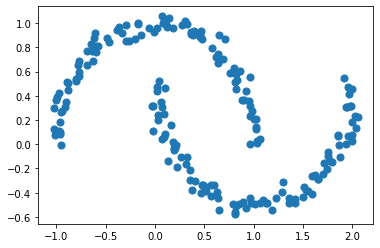

In [ ]:
# X[:,0] - > all rows col 0 ,,,, # X[0,:] - > row num 0 all col
plt.scatter(X[:, 0], X[:, 1], s=50);

##K-Means Choose K

In [ ]:
def Elbow_k_mean(X):
  distortions = [] # list to save errors
  K = range(1,10)
  for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    # kmeanModel.inertia_ => mean squared distance between the records and their centroids 
    distortions.append(kmeanModel.inertia_)
      
  plt.figure(figsize=(16,8))
  plt.plot(K, distortions, color='yellow',markerfacecolor='red', marker='*', linestyle='dashed',linewidth=2, markersize=16)
  plt.xlabel('k')
  plt.ylabel('Distortion')
  plt.title('The Elbow Method showing the optimal k')
  plt.show()

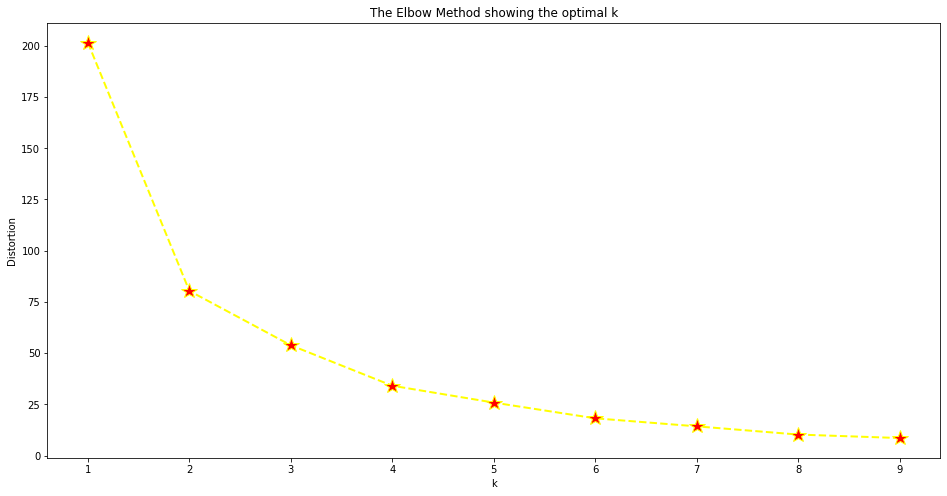

In [ ]:
Elbow_k_mean(X)

In [ ]:
kmeans = KMeans(n_clusters=2,random_state=1)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=1)

In [ ]:
centers = kmeans.cluster_centers_

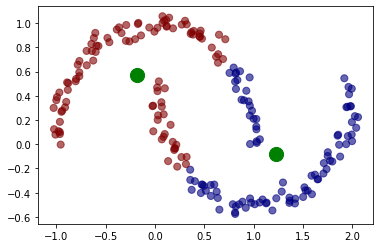

In [ ]:
# X[:,0] - > all rows col 0 ,,,, # X[0,:] - > row num 0 all col
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='jet',alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=200);

#Cancer Data

In [ ]:
df = pd.read_csv("Cancer_data.csv")

In [ ]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


In [ ]:
X_array = df.drop(columns=['diagnosis']).values # array of features only 
y = df['diagnosis'].values # array of labels only 

**T-distributed Stochastic Neighbor Embedding (TSNE):** Visualize high-dimensional data. It converts similarities between data points to joint probabilities

In [ ]:
#Creating a 2D visualization to visualize the clusters
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=40, n_iter= 4000)
X = tsne.fit_transform(X_array);

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
X

array([[ 11.392592 ,  16.995089 ],
       [ 13.945449 ,   4.5066404],
       [ 12.604021 ,  12.911123 ],
       ...,
       [  9.328285 ,   0.7582602],
       [ 12.766614 ,  16.118637 ],
       [ -9.961528 , -18.696053 ]], dtype=float32)

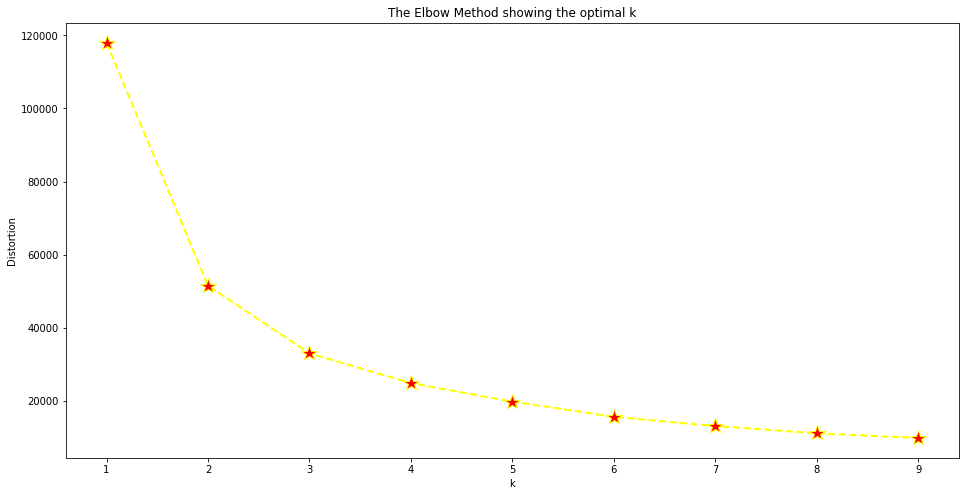

In [ ]:
Elbow_k_mean(X)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=1)

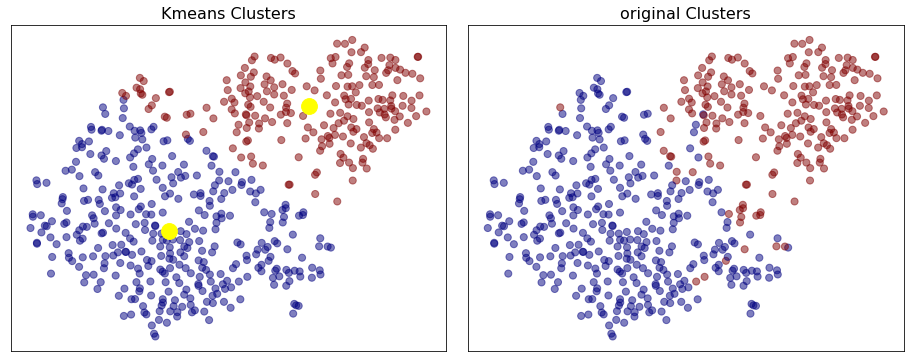

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

ax[0].scatter(X[:, 0], X[:, 1], c=kmeans.labels_,s=50, cmap='jet',alpha=0.5)
ax[0].set_title('Kmeans Clusters', size=16)
centers = kmeans.cluster_centers_
ax[0].scatter(centers[:, 0], centers[:, 1], c='yellow', s=250);

ax[1].scatter(X[:, 0], X[:, 1], c=y, s=50,cmap = "jet",alpha = 0.5);
ax[1].set_title('original Clusters', size=16);

#**Evaluate**
- silhouette_score: Calculate the mean intra-cluster distance (a) and the mean nearest-cluster distance (b)
         (b - a) / max(a, b)
- Negative values indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.
- Values near 1 are the best values.

In [ ]:
silhouette_score(X,kmeans.labels_)

0.48845223

In [ ]:
sample_silhouette_values = silhouette_samples(X, kmeans.labels_)

In [ ]:
sample_silhouette_values

array([ 0.66408795,  0.576697  ,  0.69717234,  0.56826186,  0.607263  ,
        0.5601042 ,  0.6226273 ,  0.49513826,  0.55077106,  0.55513   ,
        0.07075384,  0.5605929 ,  0.6329612 ,  0.17954923,  0.57470477,
        0.55924207,  0.0454877 ,  0.6266833 ,  0.6350192 ,  0.47879088,
        0.41054937,  0.6165518 ,  0.61113244,  0.62283075,  0.6899116 ,
        0.6646227 ,  0.5721131 ,  0.63185775,  0.659634  ,  0.5398855 ,
        0.6930302 ,  0.54083455,  0.6931355 ,  0.6855603 ,  0.5537487 ,
        0.65714496,  0.4447418 ,  0.54429483,  0.17538404,  0.3553247 ,
        0.4969518 ,  0.33859372,  0.6409699 ,  0.48225513,  0.25548753,
        0.69620097,  0.597197  ,  0.54011714,  0.6312817 ,  0.33750743,
        0.5972327 ,  0.57527804,  0.63369864,  0.6640674 ,  0.07706199,
        0.63577694,  0.68668413,  0.53148043,  0.5842197 ,  0.52230245,
        0.53618366,  0.54290193,  0.6223664 ,  0.45588976,  0.46315122,
        0.46208578,  0.5614209 ,  0.62622595,  0.18266764,  0.63